<a href="https://colab.research.google.com/github/lindsay99m/Regression/blob/main/LMoller_Regression_First_Pass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

 I will be using tornado data from NOAA's Sever Weather and Storm Prediction center
(https:/ /www.spc.noaa.gov/wcm/#data). I am interested in this data as it relates to my work on extreme event attribution and contains
data of injures, fatalities, and economic damage left by tornados recorded from 1950 to 2023. I will use this data to try and estimate
economic damage in dollar amounts and mortality rates to specific f-scale tornado rates/wind speeds in an attempt to predict future loss
and damages of torandoes. Being able to accurately estimate the total loss and damages of potential tornados based off of historical data will help local governments estimate potential loss and damages and help better allocate funds for future hazards.

**DISCLAIMER: Use High-RAM when running this notebook**

# Pre-processing

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#load in dataset
url = 'https://raw.githubusercontent.com/lindsay99m/Regression/809c517e661f8bde1c888fdd20bf4a77bec5fa56/1950-2023_all_tornadoes.csv'

data = pd.read_csv(url)
data.describe()

,om,yr,mo,dy,tz,stf,stn,mag,inj,fat,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
count,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,...,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000
mean,123921.574162,1992.500140,5.945713,15.938752,3.000924,29.111586,22.557691,0.657862,1.575506,0.103014,...,3.649528,113.051248,1.026906,0.989566,0.998165,104.276660,9.022242,1.836480,0.578700,0.026107
std,235622.304082,19.876577,2.457315,8.770595,0.071003,15.017406,31.533645,1.481439,19.993546,1.604690,...,8.604926,216.507171,0.166080,0.101616,0.457422,96.148065,39.010755,17.305165,9.687358,0.159455
min,1.000000,1950.000000,1.000000,1.000000,0.000000,1.000000,0.000000,-9.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,289.000000,1976.000000,4.000000,8.000000,3.000000,18.000000,1.000000,0.000000,0.000000,0.000000,...,0.160000,20.000000,1.000000,1.000000,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000
50%,602.000000,1995.000000,6.000000,16.000000,3.000000,28.000000,11.000000,1.000000,0.000000,0.000000,...,0.900000,50.000000,1.000000,1.000000,1.000000,85.000000,0.000000,0.000000,0.000000,0.000000
75%,1212.000000,2009.000000,7.000000,24.000000,3.000000,42.000000,30.000000,1.000000,0.000000,0.000000,...,3.500000,100.000000,1.000000,1.000000,1.000000,135.000000,0.000000,0.000000,0.000000,0.000000
max,623401.000000,2023.000000,12.000000,31.000000,9.000000,78.000000,232.000000,5.000000,1740.000000,158.000000,...,234.700000,4576.000000,3.000000,1.000000,2.000000,810.000000,820.000000,710.000000,507.000000,1.000000


In [ ]:
#show that the dataset fits the perameters
data.shape

(71398, 29)

In [ ]:
#check column names and look for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71398 entries, 0 to 71397
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   om      71398 non-null  int64  
 1   yr      71398 non-null  int64  
 2   mo      71398 non-null  int64  
 3   dy      71398 non-null  int64  
 4   date    71398 non-null  object 
 5   time    71398 non-null  object 
 6   tz      71398 non-null  int64  
 7   st      71398 non-null  object 
 8   stf     71398 non-null  int64  
 9   stn     71398 non-null  int64  
 10  mag     71398 non-null  int64  
 11  inj     71398 non-null  int64  
 12  fat     71398 non-null  int64  
 13  loss    71398 non-null  float64
 14  closs   71398 non-null  float64
 15  slat    71398 non-null  float64
 16  slon    71398 non-null  float64
 17  elat    71398 non-null  float64
 18  elon    71398 non-null  float64
 19  len     71398 non-null  float64
 20  wid     71398 non-null  int64  
 21  ns      71398 non-null  int64  
 22

In [ ]:
#rename columns
data.rename(columns={'om' : 'count',
                     'mag' : 'f-scale',
                     'inj' : 'injuries',
                     'fat' : 'fatalities',
                     'closs' : 'crop_loss',
                     'slat' : 'start_lat',
                     'slong' : 'start_long',
                     'elat' : 'end_lat',
                     'elong' : 'end_long',
                     'len' : 'length_mi',
                     'wid' : 'width_yd',
                     'ns' :'state_count',
                     'sn' : 'track',
                     'seg' : 'tornado_segment'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71398 entries, 0 to 71397
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   count        71398 non-null  int64  
 1   yr           71398 non-null  int64  
 2   mo           71398 non-null  int64  
 3   dy           71398 non-null  int64  
 4   date         71398 non-null  object 
 5   time         71398 non-null  object 
 6   tz           71398 non-null  int64  
 7   st           71398 non-null  object 
 8   stf          71398 non-null  int64  
 9   stn          71398 non-null  int64  
 10  f-scale      71398 non-null  int64  
 11  injuries     71398 non-null  int64  
 12  fatalities   71398 non-null  int64  
 13  loss         71398 non-null  float64
 14  crop_loss    71398 non-null  float64
 15  start_lat    71398 non-null  float64
 16  slon         71398 non-null  float64
 17  end_lat      71398 non-null  float64
 18  elon         71398 non-null  float64
 19  leng

In [ ]:
# Delete rows where 'f-scale' is not in [0, 1, 2, 3, 4, 5] so only realy f-scale is recorded
valid_f_scales = [0, 1, 2, 3, 4, 5]
data = data[data['f-scale'].isin(valid_f_scales)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70367 entries, 0 to 71397
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   count        70367 non-null  int64  
 1   yr           70367 non-null  int64  
 2   mo           70367 non-null  int64  
 3   dy           70367 non-null  int64  
 4   date         70367 non-null  object 
 5   time         70367 non-null  object 
 6   tz           70367 non-null  int64  
 7   st           70367 non-null  object 
 8   stf          70367 non-null  int64  
 9   stn          70367 non-null  int64  
 10  f-scale      70367 non-null  int64  
 11  injuries     70367 non-null  int64  
 12  fatalities   70367 non-null  int64  
 13  loss         70367 non-null  float64
 14  crop_loss    70367 non-null  float64
 15  start_lat    70367 non-null  float64
 16  slon         70367 non-null  float64
 17  end_lat      70367 non-null  float64
 18  elon         70367 non-null  float64
 19  length_mi

# EDA

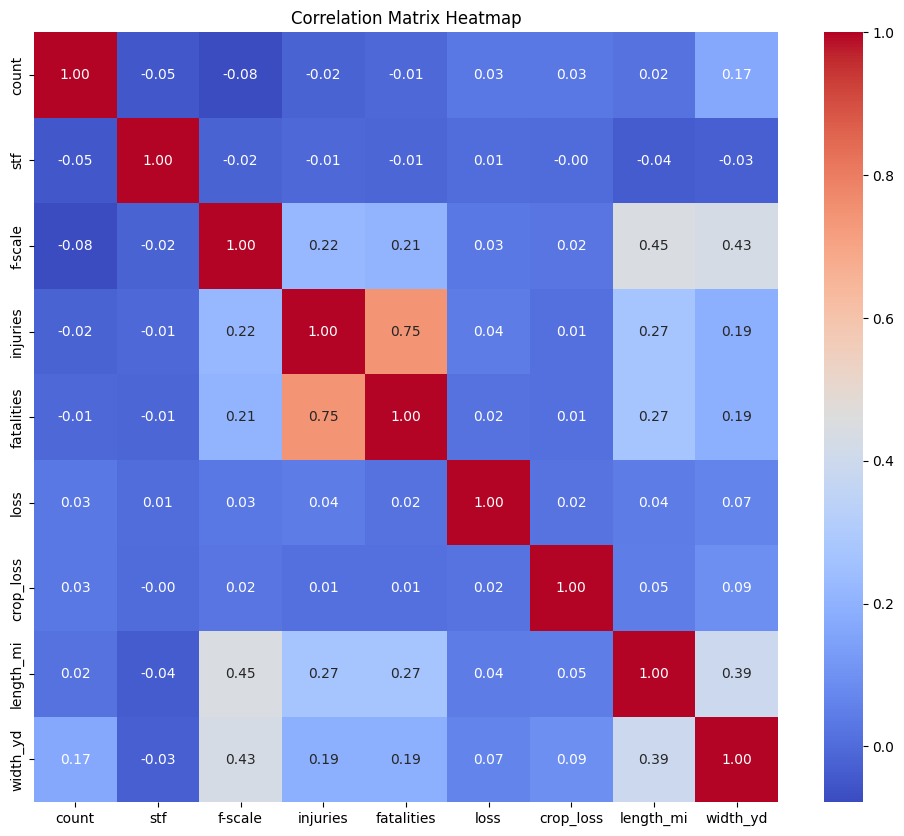

In [ ]:
# Select numerical columns for correlation analysis
numerical_cols = ['count', 'stf', 'f-scale', 'injuries', 'fatalities', 'loss', 'crop_loss', 'length_mi', 'width_yd']

# Calculate the correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

The correlation heatmap matrix shows there is a strong correlation between injuries and fatalities and a correlation between width and length of the tornado path. There appears to be a slight correlation between tornado path length  and width and fatalities, injuries, and magnitude.

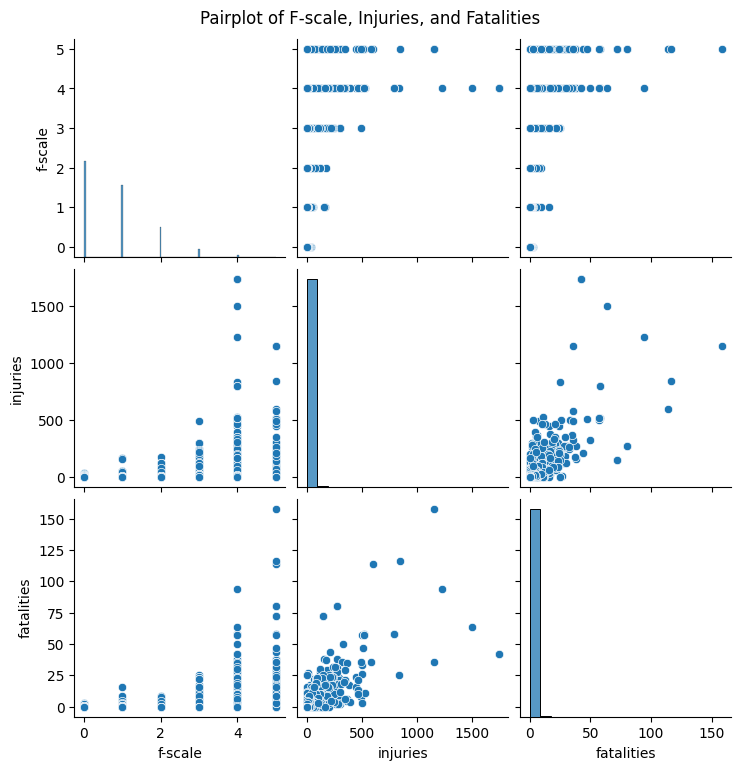

In [ ]:
# Select columns for pairplot
cols_for_pairplot = ['f-scale', 'injuries', 'fatalities']
# Create the pairplot
sns.pairplot(data[cols_for_pairplot])
plt.suptitle('Pairplot of F-scale, Injuries, and Fatalities', y=1.02)
plt.show()


The pairplot shows that data clustering is most apparent between injuries and fatalities and less apparent with f-scale.

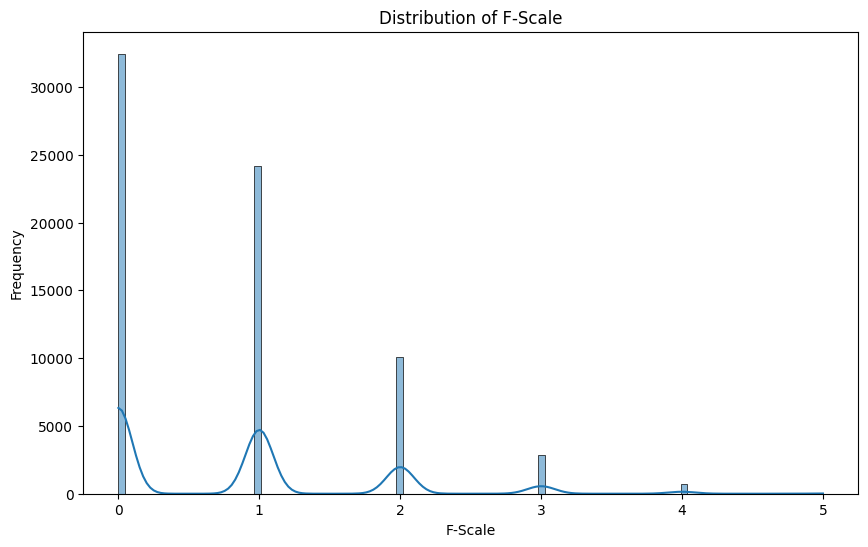

In [ ]:
# Create the distribution plot for 'f-scale'
plt.figure(figsize=(10, 6))
sns.histplot(data['f-scale'], kde=True)  # Use histplot for distribution
plt.title('Distribution of F-Scale')
plt.xlabel('F-Scale')
plt.ylabel('Frequency')
plt.show()


The distribution plot shows that the recorded tornadoes are heavily skweded towards lower level 0 f-scale events while significantly less 1-5 f-scale events are recorded.

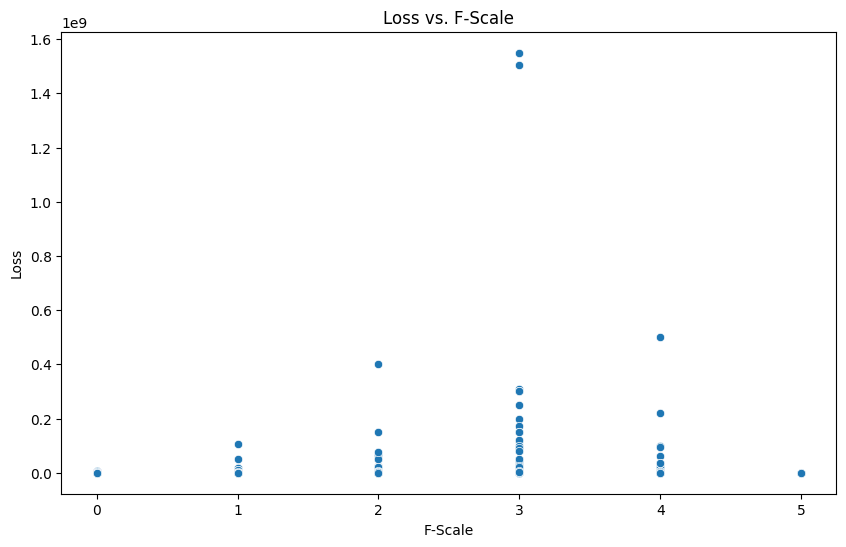

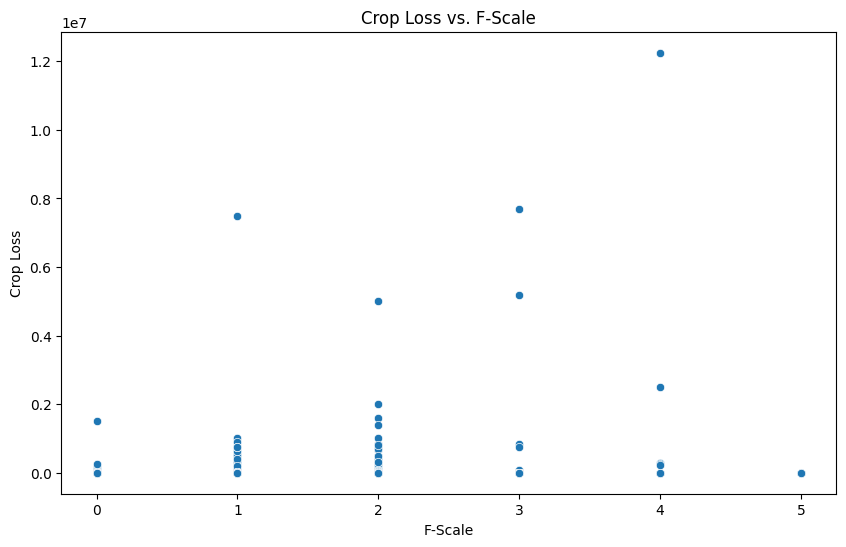

In [ ]:
# Create the scatter plot of 'loss' vs 'f-scale'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='f-scale', y='loss', data=data)
plt.title('Loss vs. F-Scale')
plt.xlabel('F-Scale')
plt.ylabel('Loss')
plt.show()

# Create the scatter plot of 'crop_loss' vs 'f-scale'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='f-scale', y='crop_loss', data=data)
plt.title('Crop Loss vs. F-Scale')
plt.xlabel('F-Scale')
plt.ylabel('Crop Loss')
plt.show()


These two plots show that significantly more economic loss and crop loss has been caused by mid grade tornadoes. This data is likely skewed due to the significantly higher number of 0 f-scale tornadoes.

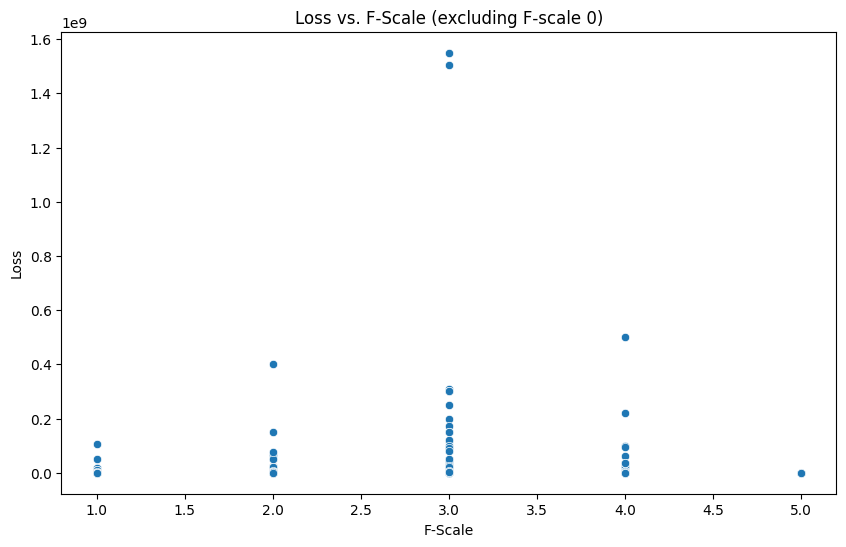

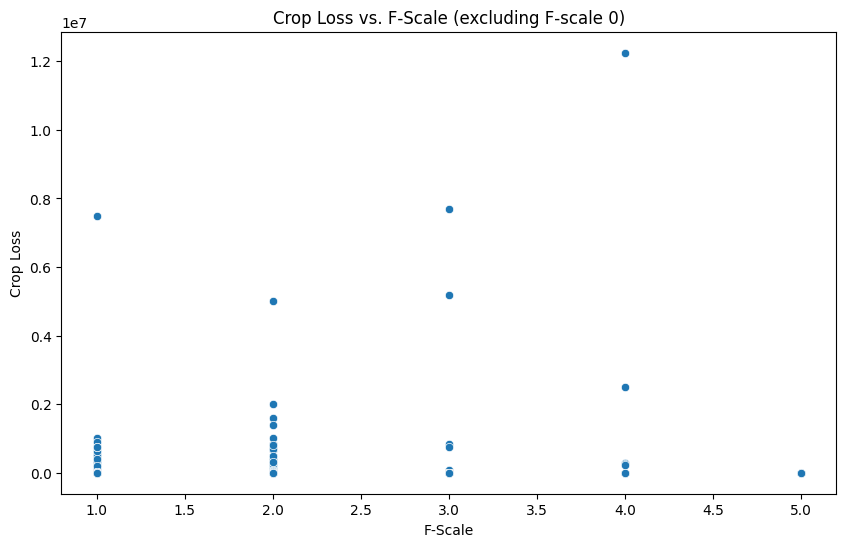

In [ ]:
# Create the scatter plot of 'loss' vs 'f-scale', ignoring f-scale values of 0
plt.figure(figsize=(10, 6))
sns.scatterplot(x='f-scale', y='loss', data=data[data['f-scale'] != 0])
plt.title('Loss vs. F-Scale (excluding F-scale 0)')
plt.xlabel('F-Scale')
plt.ylabel('Loss')
plt.show()

# Create the scatter plot of 'crop_loss' vs 'f-scale', ignoring f-scale values of 0
plt.figure(figsize=(10, 6))
sns.scatterplot(x='f-scale', y='crop_loss', data=data[data['f-scale'] != 0])
plt.title('Crop Loss vs. F-Scale (excluding F-scale 0)')
plt.xlabel('F-Scale')
plt.ylabel('Crop Loss')
plt.show()


By removing the f-scale 0 events we are able to better see the distribution on loss and crop loss of stronger tornadoes. On average the 2-4 scale toradoes have recorded higher economic damage.

# Pre-processing for modeling

In [ ]:
#drop unnecessary columns
data.drop(['date', 'time','st', 'count', 'yr', 'mo', 'dy', 'tz', 'stf', 'stn', 'state_count', 'slon', 'start_lat', 'end_lat', 'elon', 'track', 'sg', 'f1', 'f2', 'f3', 'f4', 'fc'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70367 entries, 0 to 71397
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   f-scale     70367 non-null  int64  
 1   injuries    70367 non-null  int64  
 2   fatalities  70367 non-null  int64  
 3   loss        70367 non-null  float64
 4   crop_loss   70367 non-null  float64
 5   length_mi   70367 non-null  float64
 6   width_yd    70367 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 4.3 MB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns you want to scale
columns_to_scale = ['loss', 'crop_loss', 'injuries', 'fatalities', 'length_mi', 'width_yd']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to your data and transform the selected columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Now the specified columns in the 'data' DataFrame are scaled between 0 and 1
print(data.head())


   f-scale  injuries  fatalities          loss  crop_loss  length_mi  width_yd
0        1  0.000000         0.0  2.580645e-09        0.0   0.067320  0.002185
1        3  0.001724         0.0  3.225806e-09        0.0   0.008522  0.192308
2        2  0.000000         0.0  3.225806e-09        0.0   0.000426  0.002185
3        1  0.000000         0.0  3.225806e-09        0.0   0.000426  0.002185
4        1  0.001724         0.0  2.580645e-09        0.0   0.008522  0.008086


In [ ]:
#split data
from sklearn.model_selection import train_test_split

# Example: Predict 'loss' based on other features
X = data.drop('loss', axis=1)  # Features (all columns except 'loss')
y = data['loss']  # Target variable ('loss')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

# Now you have X_train, X_test, y_train, and y_test for model training and evaluation
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (56293, 6)
Testing data shape: (14074, 6)


# Modeling

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Squared Error (RMSE): 0.008208819885327798
Mean Absolute Error (MAE): 0.00024886674122178316


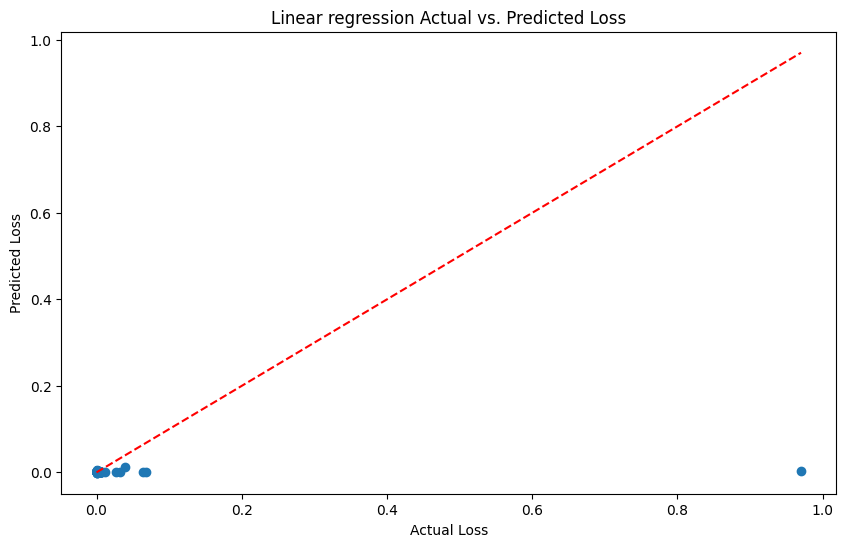

In [ ]:
#plot model
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Loss")
plt.ylabel("Predicted Loss")
plt.title("Linear regression Actual vs. Predicted Loss")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line for reference
plt.show()

The Linear regression model scored very close to zero with both RMSE and MAE scoring meaning that the model is statistically reliable. Based off of the scatter plot you can see that the model predicted little to no loss in comparisson to the actual loss recorded. This discrepency in the predicted values and actual values, but the low RMSE and MAE values are likely due to the bias for low reported loss in the dataset.

## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Initialize and train the SVM model
svm_model = SVR(kernel='poly', degree=3)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
svm_y_pred = svm_model.predict(X_test)

# Evaluate the SVM model
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_y_pred))
svm_mae = mean_absolute_error(y_test, svm_y_pred)

print(f"SVM - Root Mean Squared Error (RMSE): {svm_rmse}")
print(f"SVM - Mean Absolute Error (MAE): {svm_mae}")


SVM - Root Mean Squared Error (RMSE): 0.10043166638926428
SVM - Mean Absolute Error (MAE): 0.1002104974839959


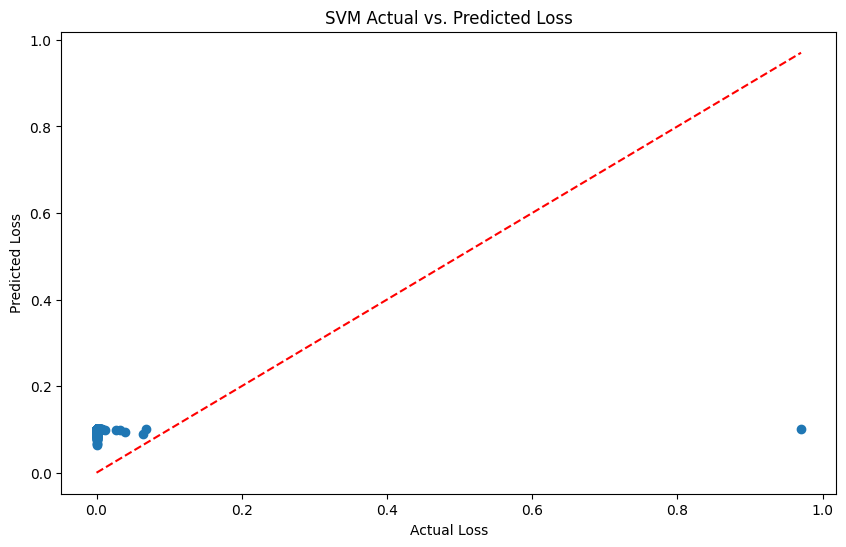

In [ ]:
#plot model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svm_y_pred)
plt.xlabel("Actual Loss")
plt.ylabel("Predicted Loss")
plt.title("SVM Actual vs. Predicted Loss")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line for reference
plt.show()

Like the linear regression model, the SVM model scored very to zero with both RMSE and MAE scoring meaning that the model is statistically reliable. The SVM model performed worse than the linear regression model, but predicted higher loss on average than the actual reported data. While this means that the model performed worse, it is better for real world model usage to have a slightly higher predicted loss than actual so that people can be prepared for damages after the event.

## Gradient Boosting Classifier

Gradient Boosting - Root Mean Squared Error (RMSE): 0.008050118986137295
Gradient Boosting - Mean Absolute Error (MAE): 0.00016792890579391277


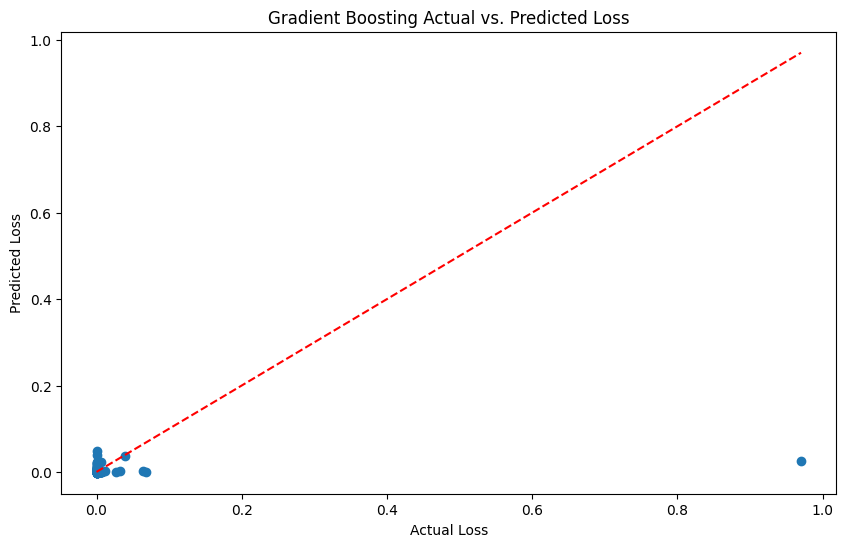

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Classifier model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
gb_y_pred = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_y_pred))
gb_mae = mean_absolute_error(y_test, gb_y_pred)

print(f"Gradient Boosting - Root Mean Squared Error (RMSE): {gb_rmse}")
print(f"Gradient Boosting - Mean Absolute Error (MAE): {gb_mae}")

# Plot the model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_y_pred)
plt.xlabel("Actual Loss")
plt.ylabel("Predicted Loss")
plt.title("Gradient Boosting Actual vs. Predicted Loss")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line for reference
plt.show()

The gradient boosting classifier model also scored very close to zero with both RMSE and MAE scoring meaning that the model is statistically reliable. It performed the best out of the three models. This model predicted a wider range of loss values than the other models and accurately predicted more points than the other two models.

# Write-up

### Which method did you like the most?

I liked the gradient boosting classifier method the most because it gave me the most control with my hyperparameter tuning and allowed me to test out my model inorder to find the best fit between my model and my data. For similar reasons I also liked the SVM method which while that had some hyperparameter tuning I did not feel like I had as much control as I did with the gradient bossiting classifier method. These models also predicted non zero loss and therefore work better as real world models.

### Which method did you like the least?

I liked the linear regression model the least as I felt that model fit the actual data the least and used the bais in the data towards the lower end of the loss scale to predict little to no loss and still preformed well "statistically" but not necessarly in a real world scenario. If tornadoes are always predicted to have little to no economic loss then it could create huge issues for funding allocations for disaster relief.  

### How did you score these supervised models?  


I used RMSE and MAE to score all of my models. I used RMSE to try and stay away from large errors, however there is a significant outlier in the loss data which could pose an issue to the RMSE score. MAE on the other hand handles outliers better so I included MAE scoring as a comparison to RMSE.

### Did the output align with your geologic understanding?

Overall the output of my models aligned with my geologic understanding of tornadoes, because tornadoes are highly variable and hard to predict. Because they tend to fall in the midwest the amount of damage they cause can also be highly variable depending on if they travel through towns, farms, and refineries or if they fall and travel through unpopulated plains and other areas that are used by people. So even if a torando is recorded at a 5 on the f-scale it could cause little to no economic damage based on where it falls. On the flip side a 2 f-scale tornado could cause significant economic damage if it falls in a populated area.

### What did you want to learn more about?

I would like to learn more about what other models and methods would work best for my dataset (for example would more complex models work better for my dataset). I would also like to know if there is a better way to scale my data to help nuetralize the bais in my loss data without compramizing the integrity of my data and my models.

### Did you pre-process your data?

I cleaned my data and removed variables that were unnecessary for the models. I also used MinMaxScaler to scale the important variables. I removed the temporal and spatial data from my dataset in the pre-processing section and then randomly split my data using a 80% training and 20% testing split.

### Do all models require pre-processing?

Linear regression requires little to no pre-processing besides dataset cleaning due to its simplicity, but in general it is always good to pre-process your data to help improve model training and performance. More complex regression models require more indepth pre-processing.